In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ROOT.gStyle.SetOptStat(0)

## Load the ROOT file and histograms

In [2]:
f = ROOT.TFile('energyTimeBreakdown.root')
hNumu = f.Get('nuMu')
hAntiNumu = f.Get('antiNuMu')
hNue = f.Get('nuE')

### Project Y and X axes to get the energy and time distributions, respectively

In [3]:
hNumuEnergy = hNumu.ProjectionY()
hAntiNumuEnergy = hAntiNumu.ProjectionY()
hNueEnergy = hNue.ProjectionY()

In [4]:
cEnergy = ROOT.TCanvas('Energy', 'Energy', 800, 600)
hNumuEnergy.Draw()
hAntiNumuEnergy.Draw('same')
hNueEnergy.Draw('same')
cEnergy.Draw()

In [5]:
hNumuTime = hNumu.ProjectionX()
hAntiNumuTime = hAntiNumu.ProjectionX()
hNueTime = hNue.ProjectionX()

In [6]:
cTime = ROOT.TCanvas('Time', 'Time', 1000, 600)
hNumuTime.Draw()
hAntiNumuTime.Draw('same')
hNueTime.Draw('same')
cTime.Draw()

Check a few features of the projection histograms

In [7]:
hNumuEnergy.GetNbinsX()

300

In [8]:
hNumuEnergy.GetXaxis().GetBinWidth(1)

1.0

In [9]:
hNumuTime.GetNbinsX()

5005

In [10]:
hNumu.GetMaximum()

196363.0

In [11]:
hNumuTime.GetXaxis().GetBinWidth(5)

4.0

## Convolve the time distributions with the POT measurements
Read data from AvgTrace_CsI.txt

In [12]:
hDelayed = hAntiNumuTime.Clone()
hDelayed.Add(hNueTime)

True

In [13]:
hPOT = ROOT.TH1D("hPOT", "hPOT", 1500, 0, 15000)

In [14]:
potTrace = np.genfromtxt( 'AvgTrace_CsI.txt', skip_header = 1 )

In [15]:
for i in range( len(potTrace) ):
    if potTrace[i] > 0.00001:
        found = i
        break
found

143

In [16]:
for i in range( 0, hPOT.GetNbinsX() ):
    if i < len(potTrace):
        if potTrace[i] < 0.: potTrace[i] = 0.
        hPOT.SetBinContent(i-found, potTrace[i])
    else:
        hPOT.SetBinContent(i, 0.)

In [17]:
cPOT = ROOT.TCanvas('POT', 'POT', 1000, 600)
hPOT.Draw()
cPOT.Draw()

In [18]:
for i in range( len(potTrace)):
    if potTrace[i] < 0.:
        print( f'bin {i}, POT {potTrace[i]} < 0')

In [19]:
BeamTime = np.linspace(0, 15000, 1500)
hPromptConvolved = ROOT.TH1D("hPromptConvolved", "hPromptConvolved; Creation Time (ns); arb. units", 1500, 0, 15000)
hDelayedConvolved = ROOT.TH1D("hDelayedConvolved", "hDelayedConvolved", 1500, 0, 15000)

In [20]:
hNumuTime.GetEntries()

1569767.0

In [21]:
for i in range( int(hNumuTime.GetEntries()) ):
    hPromptConvolved.Fill( hNumuTime.GetRandom()+hPOT.GetRandom() )

In [22]:
for i in range( int(hDelayed.GetEntries()) ):
    hDelayedConvolved.Fill( hDelayed.GetRandom() + hPOT.GetRandom() )

In [23]:
hPromptConvolved.Scale(1.e3/(hPromptConvolved.Integral()))
hDelayedConvolved.Scale(1.e3/(hDelayedConvolved.Integral()))
hPOT.Scale(1.e3/(hPOT.Integral()))

## Plots
### SNS energy spectrum

In [24]:
E = np.linspace(0., 300., 300)
NumuF = np.zeros((300))
AntiNumuF = np.zeros((300))
NueF = np.zeros((300))

In [25]:
for ibin in range(0, 300):
    NumuF[ibin] = hNumuEnergy.GetBinContent(ibin+1)
    AntiNumuF[ibin] = hAntiNumuEnergy.GetBinContent(ibin+1)
    NueF[ibin] = hNueEnergy.GetBinContent(ibin+1)

[]

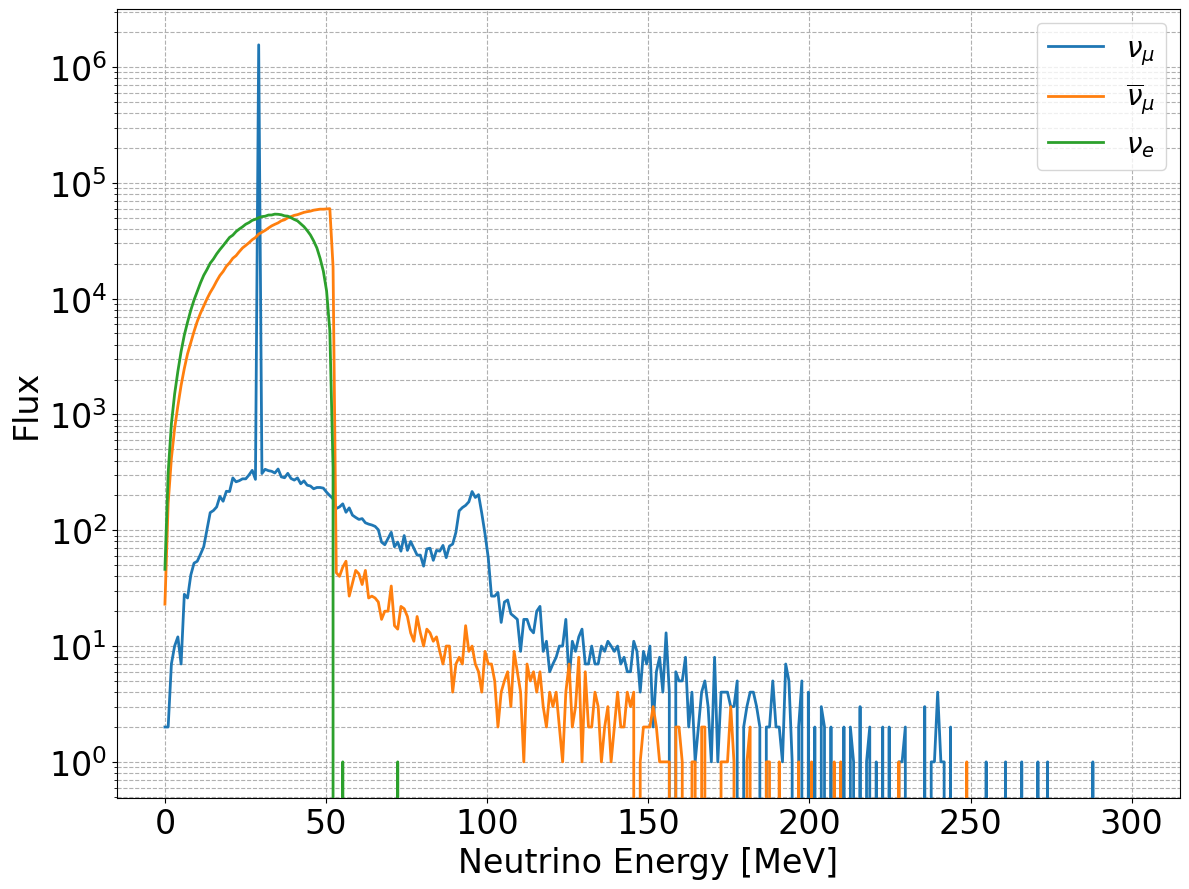

In [26]:
fig, ax = plt.subplots( figsize = (12, 9), layout = 'tight' )
ax.plot( E, NumuF, label = r'$\nu_{\mu}$', lw = 2 )
ax.plot( E, AntiNumuF, label = r'$\overline{\nu}_{\mu}$', lw = 2 )
ax.plot( E, NueF, label = r'$\nu_e$', lw = 2 )

ax.set_xlabel( 'Neutrino Energy [MeV]', fontsize = 24 )
ax.tick_params( axis = 'x', labelsize = 24 )
ax.set_ylabel( 'Flux', fontsize = 24 )
ax.tick_params( axis = 'y', labelsize = 24 )
ax.yaxis.get_offset_text().set_fontsize( 24 )
ax.legend( loc = 'upper right', ncol = 1, fontsize = 20 )
ax.grid( which = 'both', linestyle = '--' )
# ax.set_xlim([0, 100])
ax.semilogy()

In [27]:
NumuF[29]

1553609.0

In [28]:
AntiNumuF[51]

59832.0

### SNS time distribution

In [29]:
PromptF = np.zeros((1500))
DelayedF = np.zeros((1500))
potF = np.zeros((1500))

In [30]:
for ibin in range(0, 1500):
    PromptF[ibin] = hPromptConvolved.GetBinContent(ibin+1)
    DelayedF[ibin] = hDelayedConvolved.GetBinContent(ibin+1)
    potF[ibin] = hPOT.GetBinContent(ibin+1)

0.93

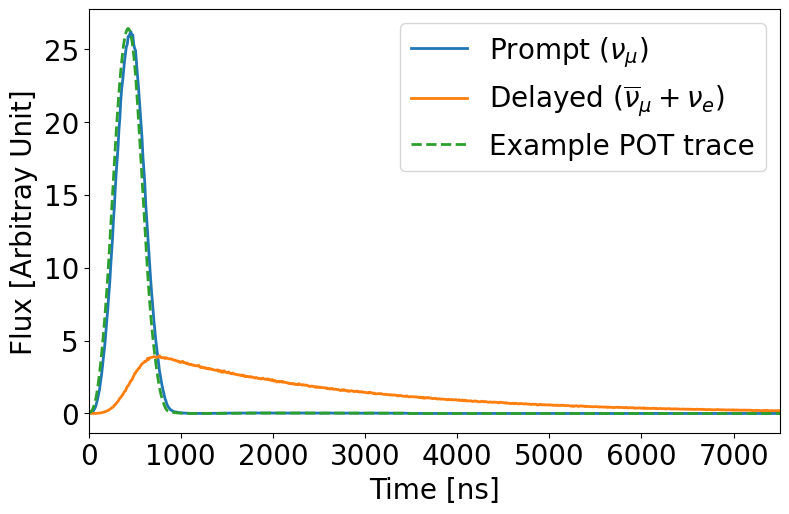

In [31]:
fig1, ax1 = plt.subplots( figsize = (8, 5.5) )
ax1.plot( BeamTime, PromptF, label = r'Prompt ($\nu_{\mu}$)', lw = 2 )
ax1.plot( BeamTime, DelayedF, label = r'Delayed ($\overline{\nu}_{\mu}+\nu_e$)', lw = 2 )
ax1.plot( BeamTime, potF, label = 'Example POT trace', lw = 2, linestyle = '--' )

ax1.set_xlabel( 'Time [ns]', fontsize = 20 )
ax1.tick_params( axis = 'x', labelsize = 20 )
ax1.set_ylabel( r'Flux [Arbitray Unit]', fontsize = 20 )
ax1.tick_params( axis = 'y', labelsize = 20 )
ax1.yaxis.get_offset_text().set_fontsize( 20 )
ax1.legend( loc = 'upper right', ncol = 1, fontsize = 20 )
# ax1.grid( which = 'both', linestyle = '--' )
ax1.set_xlim([0, 7500])
fig1.subplots_adjust( left = 0.096, right = 0.96, top = 0.93, bottom = 0.16)
# fig1.savefig('SNSTiming.pdf')
fig1.subplotpars.top

In [32]:
len(DelayedF)

1500

In [33]:
np.save('DelayedNeutrinosPer10ns.npy', DelayedF)

In [34]:
DelayedF[75], DelayedF[750], DelayedF[1400]

(3.8703590980424973, 0.18682730195188224, 0.010219613098222618)

In [35]:
len(PromptF)

1500

In [36]:
np.save('PromptNeutrinosPer10ns.npy', PromptF)

### Comparison of the SNS and SN energy spectra

In [32]:
fNH = '/Users/yuntse/data/coherent/NDSupernova/flux/grid/nh/pinched_200289.dat'
fIH = '/Users/yuntse/data/coherent/NDSupernova/flux/grid/ih/pinched_200289.dat'

In [33]:
NH = pd.read_csv( fNH, header = None, sep = r'\s+', names = ['E', 'nue', 'numu', 'nutau', 'nuebar', 'numubar', 'nutaubar' ])
IH = pd.read_csv( fIH, header = None, sep = r'\s+', names = ['E', 'nue', 'numu', 'nutau', 'nuebar', 'numubar', 'nutaubar' ])

In [34]:
NumuF.argmax()

29

In [35]:
fineE = np.zeros((302))
fineNumuF = np.zeros((302))
for i in range(30):
    fineE[i] = E[i]
    fineNumuF[i] = NumuF[i]

fineE[30] = 29.6
fineE[31] = 29.8
fineNumuF[30] = NumuF[29]
fineNumuF[29] = NumuF[28]
fineNumuF[31] = NumuF[30]
for i in range(32, 302):
    fineE[i] = E[i-2]
    fineNumuF[i] = NumuF[i-2]


In [36]:
fineE[27:33]

array([27.090301  , 28.09364548, 29.09698997, 29.6       , 29.8       ,
       30.10033445])

In [37]:
fineNumuF[27:33]

array([3.290000e+02, 2.750000e+02, 2.750000e+02, 1.553609e+06,
       3.090000e+02, 3.090000e+02])

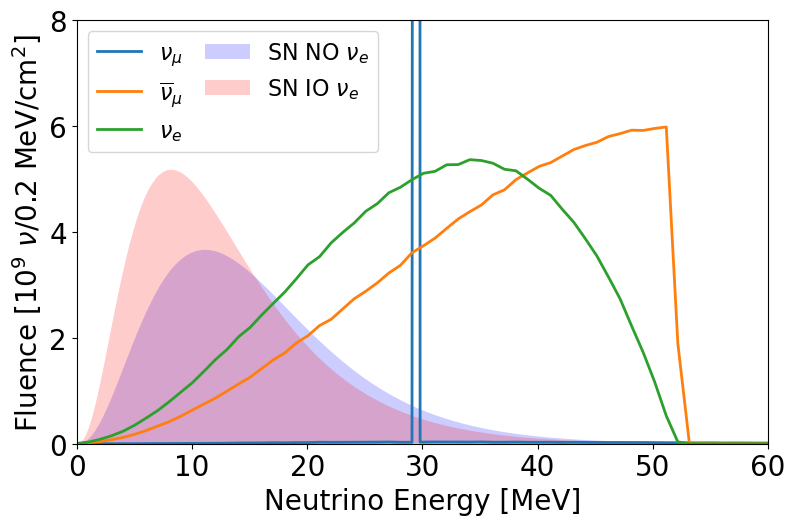

In [38]:
fig2, ax2 = plt.subplots( figsize = (8, 5.5) )
ax2.plot( fineE, fineNumuF/1e4, label = r'$\nu_{\mu}$', lw = 2 )
ax2.plot( E, AntiNumuF/1e4, label = r'$\overline{\nu}_{\mu}$', lw = 2 )
ax2.plot( E, NueF/1e4, label = r'$\nu_e$', lw = 2 )
ax2.fill_between( NH['E']*1000, NH['nue']*2/1e9, 0, color = 'blue', alpha = 0.2, label = r'SN NO $\nu_e$', lw = 0 )
ax2.fill_between( IH['E']*1000, IH['nue']*2/1e9, 0, color = 'red', alpha = 0.2, label = r'SN IO $\nu_e$', lw = 0 )

ax2.set_xlabel( 'Neutrino Energy [MeV]', fontsize = 20 )
ax2.tick_params( axis = 'x', labelsize = 20 )
ax2.set_ylabel( r'Fluence [$10^9$ $\nu$/0.2 MeV/cm$^2$]', fontsize = 20 )
# ax2.set_ylabel( r'Fluence [Arbitraty Unit]', fontsize = 20 )
ax2.tick_params( axis = 'y', labelsize = 20 )
ax2.yaxis.get_offset_text().set_fontsize( 20 )
ax2.legend( loc = 'upper left', ncol = 2, fontsize = 16, columnspacing = 1 )
# ax2.grid( which = 'both', linestyle = '--' )
ax2.set_xlim([0, 60])
ax2.set_ylim([0, 8])
fig2.subplots_adjust( left = 0.096, right = 0.96, top = 0.93, bottom = 0.16)
fig2.savefig('SNSEnergy.pdf')

In [39]:
ax2.figure.subplotpars.top

0.93

In [40]:
NH['E']*1000

0        0.0
1        0.2
2        0.4
3        0.6
4        0.8
       ...  
496     99.2
497     99.4
498     99.6
499     99.8
500    100.0
Name: E, Length: 501, dtype: float64

In [41]:
AntiNumuF[51]/1e4

5.9832

In [42]:
E[52]

52.17391304347826

In [43]:
NumuF[29]/AntiNumuF[51]

25.96618866158577

In [44]:
AntiNumuF[51]*25.96618866158577/1e4

155.3609

In [45]:
for i in range(1, 54):
    # print(f'{hNueEnergy.GetBinContent(i)}, ')
    print(hNueEnergy.GetBinLowEdge(i), hNueEnergy.GetBinContent(i))

0.0 46.0
1.0 314.0
2.0 830.0
3.0 1501.0
4.0 2353.0
5.0 3494.0
6.0 4850.0
7.0 6268.0
8.0 7948.0
9.0 9725.0
10.0 11528.0
11.0 13683.0
12.0 15896.0
13.0 17812.0
14.0 20208.0
15.0 21979.0
16.0 24325.0
17.0 26514.0
18.0 28670.0
19.0 31171.0
20.0 33787.0
21.0 35331.0
22.0 37934.0
23.0 39898.0
24.0 41703.0
25.0 43911.0
26.0 45353.0
27.0 47414.0
28.0 48450.0
29.0 49877.0
30.0 51086.0
31.0 51457.0
32.0 52694.0
33.0 52733.0
34.0 53656.0
35.0 53500.0
36.0 52986.0
37.0 51847.0
38.0 51557.0
39.0 49960.0
40.0 48259.0
41.0 46917.0
42.0 44290.0
43.0 41826.0
44.0 38719.0
45.0 35455.0
46.0 31488.0
47.0 27390.0
48.0 22244.0
49.0 17263.0
50.0 11648.0
51.0 5269.0
52.0 347.0


In [46]:
help(hNueEnergy)

Help on TH1D in module __main__ object:

class TH1D(TH1, TArrayD)
 |  Method resolution order:
 |      TH1D
 |      TH1
 |      TNamed
 |      TObject
 |      TAttLine
 |      TAttFill
 |      TAttMarker
 |      TArrayD
 |      TArray
 |      CPPInstance
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  AddBinContent(...)
 |      void TH1D::AddBinContent(Int_t bin)
 |      void TH1D::AddBinContent(Int_t bin, Double_t w)
 |  
 |  Class(...)
 |      static TClass* TH1D::Class()
 |  
 |  Class_Name(...)
 |      static const char* TH1D::Class_Name()
 |  
 |  Class_Version(...)
 |      static short TH1D::Class_Version()
 |  
 |  Copy(...)
 |      void TH1D::Copy(TObject& hnew)
 |  
 |  DeclFileLine(...)
 |      static int TH1D::DeclFileLine()
 |  
 |  DeclFileName(...)
 |      static const char* TH1D::DeclFileName()
 |  
 |  Dictionary(...)
 |      static TClass* TH1D::Dictionary()
 |  
 |  ImplFileLine(...)
 |      static int TH1D::ImplFileLine()
 |  
 |  ImplFileName(...)
 |

In [47]:
np.linspace(0,53,54)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53.])